Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Data Exploration

In [4]:
df.shape

(1025, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Column:

Sex: Gender: 0-female; 1-male

(1) cp: chest pain type
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic

(2) trestbps: resting blood pressure (in mm Hg)

(3) chol: serum cholestrol in mg

(4) fbs: fasting blood sugar > 120 mg
    - 1 = true
    - 0 = false

(5) restecg: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormaility
    - 2: left ventricular hypertrophy

(6) thalach: max heart rate achieved

(7) exang: exercise induced angina (1=yes, 0=no)

(8) oldpeak: ST depression induced by exercise relative to rest

(9) slope: the slope of the peak exercise ST segment
    - 1: upsloping
    - 2: flat
    - 3: downloping

(10) ca: number of major vessels (0-3) colored by flourosopy

(11) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

(12) target: 0=less chance of heart attack, 1 = more chance of heart attack

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

To check if there are any NULL values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

To drop dulicate rows

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(302, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

Correlation Matrix

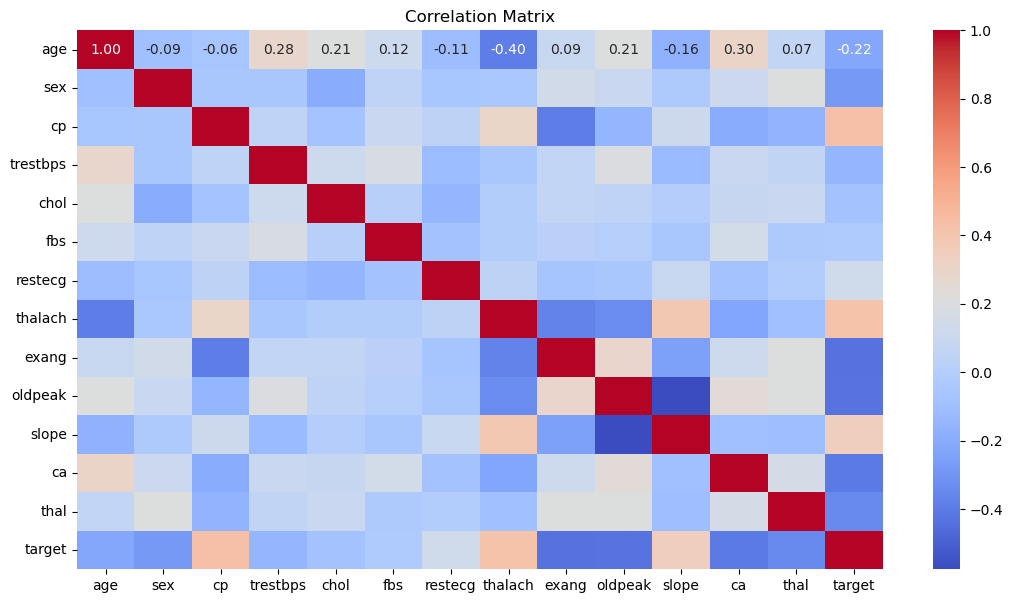

In [12]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Heart Disease Distribution (target variable)

In [13]:
df['target'].value_counts()

# 1 = more chance of heart attack
# 0 = less chance of heart attack

target
1    164
0    138
Name: count, dtype: int64

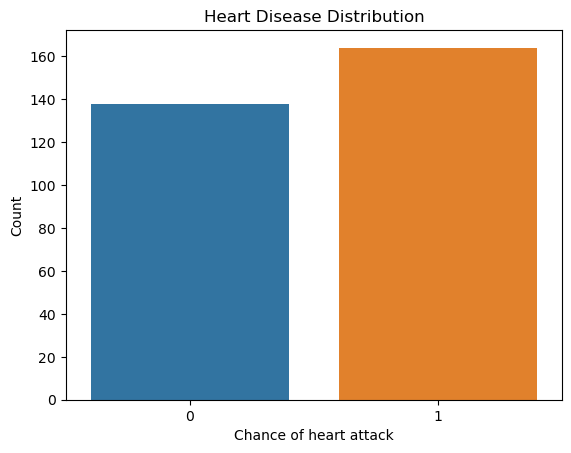

In [14]:
sns.countplot(x=df['target'])
plt.title("Heart Disease Distribution")
plt.xlabel("Chance of heart attack")
plt.ylabel("Count")
plt.show()

Gender Distribution

In [15]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

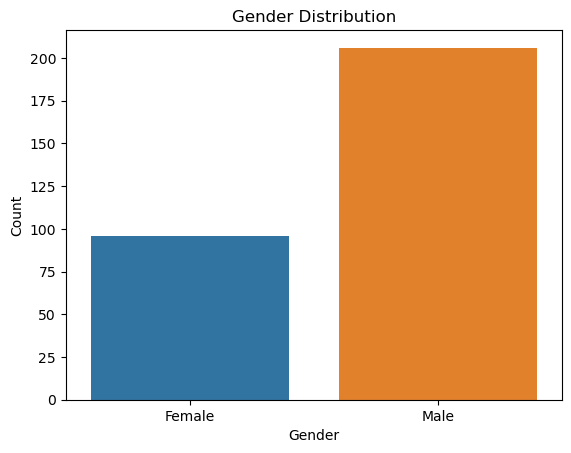

In [16]:
sns.countplot(x=df['sex'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel("Count")
plt.show()

Gender Distibution as per Target Variable

In [17]:
df['target'] = df['target'].astype(str)

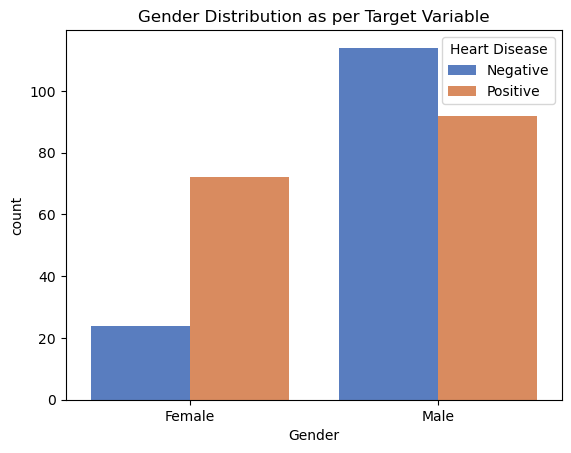

In [18]:
sns.countplot(x='sex', hue='target', data=df, palette='muted')
plt.title("Gender Distribution as per Target Variable")
plt.xlabel("Gender")
plt.xticks([0,1], ['Female', 'Male'])
plt.legend(title='Heart Disease', labels=['Negative', 'Positive'], loc='upper right')
plt.show()

- We notice that although Male has more records of higher risk of heart attakc, Female has a higher percentage of high risk of heart attack

Age Distribution (Histogram)

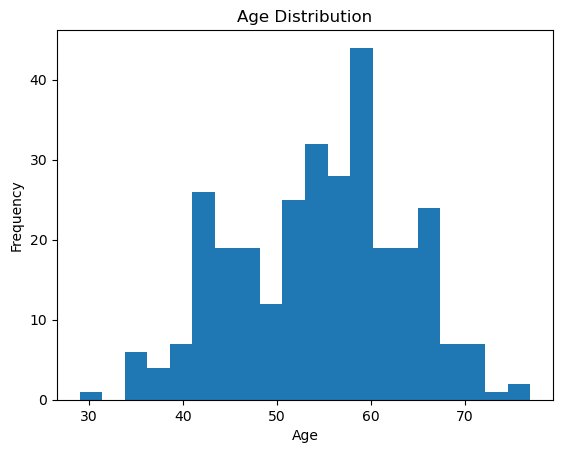

In [19]:
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Chest Pain Type Analysis

(1) cp: chest pain type
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic

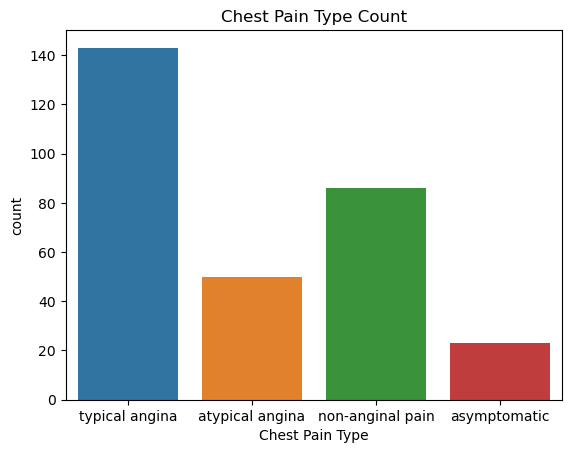

In [20]:
sns.countplot(x=df['cp'])
plt.title('Chest Pain Type Count')
plt.xlabel('Chest Pain Type')
plt.xticks([0,1,2,3], ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

Chest Pain Distribution as per Target Variable

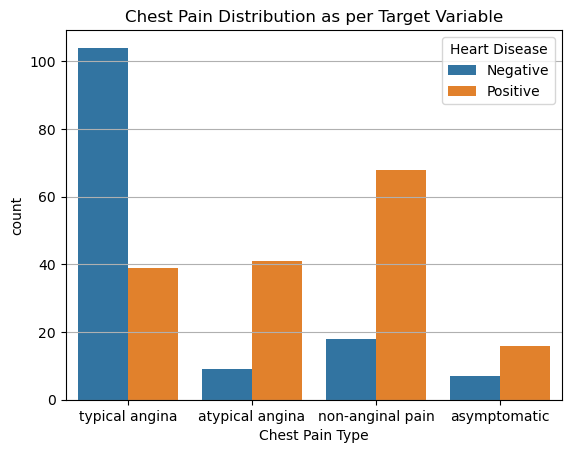

In [21]:
sns.countplot(x=df['cp'], hue = df['target'])
plt.title('Chest Pain Distribution as per Target Variable')
plt.xlabel('Chest Pain Type')
plt.xticks([0,1,2,3], ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.legend(title='Heart Disease', labels=['Negative', 'Positive'], loc='upper right')
plt.grid(axis='y')
plt.show()

- People with typical angina has lower risk of having heart attack. On the other hand, people with non-anginal pain has a much higher risk of getting heart attack

Fasting Blood Sugar Distribution

(4) fbs: fasting blood sugar > 120 mg
    - 1 = true
    - 0 = false

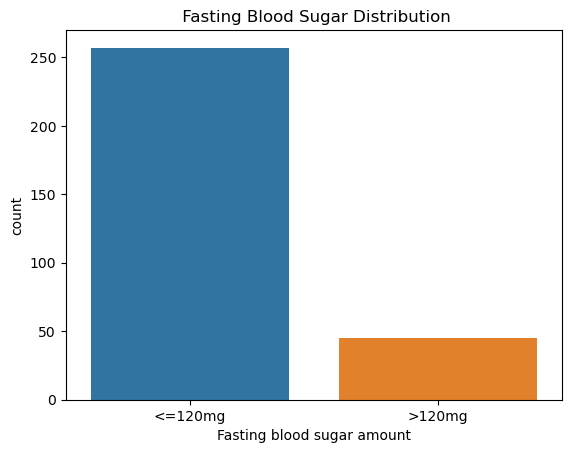

In [ ]:
sns.countplot(x=df['fbs'])
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting blood sugar amount')
plt.xticks([1,0], ['>120mg', '<=120mg'])
plt.show()

Fasting Blood Sugar Distribution as per Target Variable

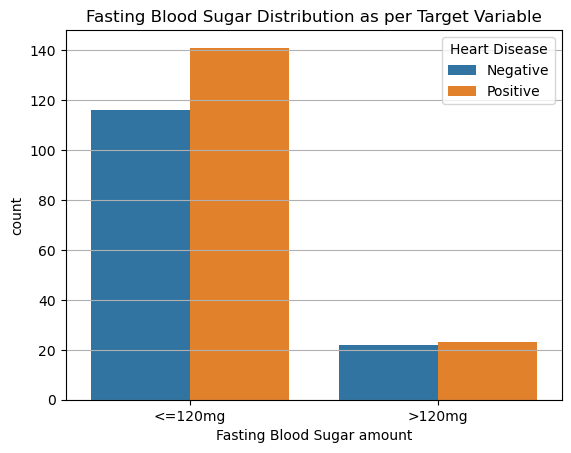

In [24]:
sns.countplot(x=df['fbs'], hue = df['target'])
plt.title('Fasting Blood Sugar Distribution as per Target Variable')
plt.xlabel('Fasting Blood Sugar amount')
plt.xticks([1,0], ['>120mg', '<=120mg'])
plt.legend(title='Heart Disease', labels=['Negative', 'Positive'], loc='upper right')
plt.grid(axis='y')
plt.show()

- Keeping the fasting blood sugar bloe 120mg is a great way to prevent risk of heart problems

Resting Blood Pressure Distribution

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


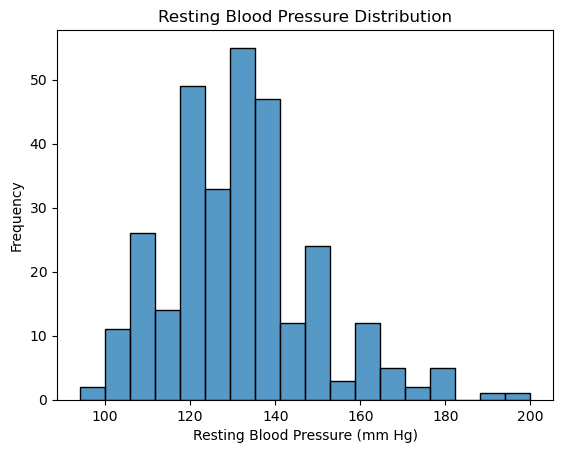

In [25]:
sns.histplot(x=df['trestbps'])
plt.title("Resting Blood Pressure Distribution")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.ylabel("Frequency")
plt.show()

Resting Blood Pressure Comparison by Sex (Box plot)

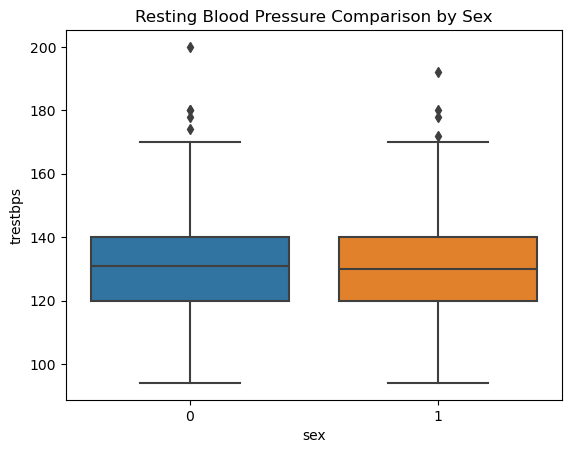

In [27]:
sns.boxplot(x=df['sex'], y=df['trestbps'])
plt.title("Resting Blood Pressure Comparison by Sex")
plt.show()

Serum Cholesterol Distribution

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


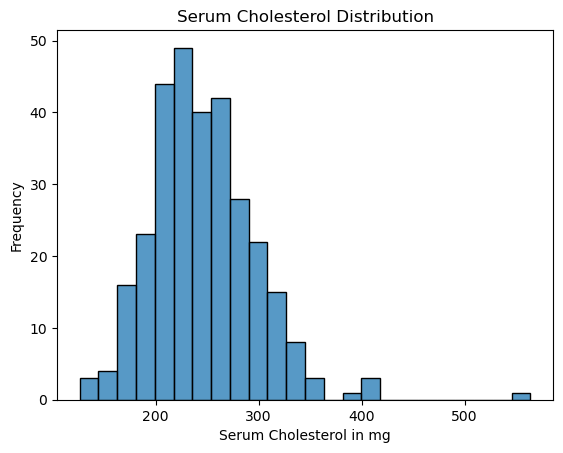

In [28]:
sns.histplot(x=df['chol'])
plt.title("Serum Cholesterol Distribution")
plt.xlabel("Serum Cholesterol in mg")
plt.ylabel("Frequency")
plt.show()

Serum Cholesterol Distibution as per target variable

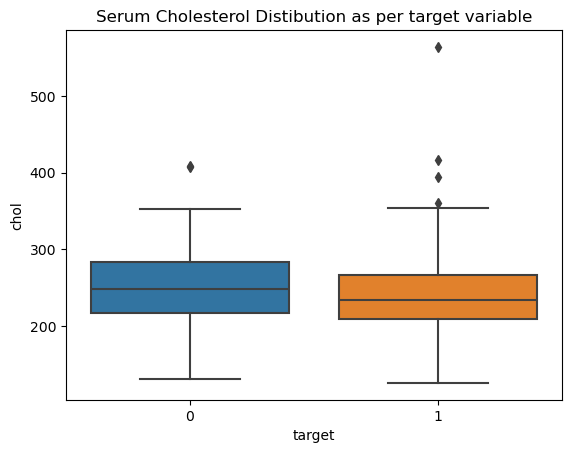

In [30]:
sns.boxplot(x=df['target'], y=df['chol'])
plt.title("Serum Cholesterol Distibution as per target variable")
plt.show()

- higher chol does not determine the risk of having heart problems

Plot continuous variables

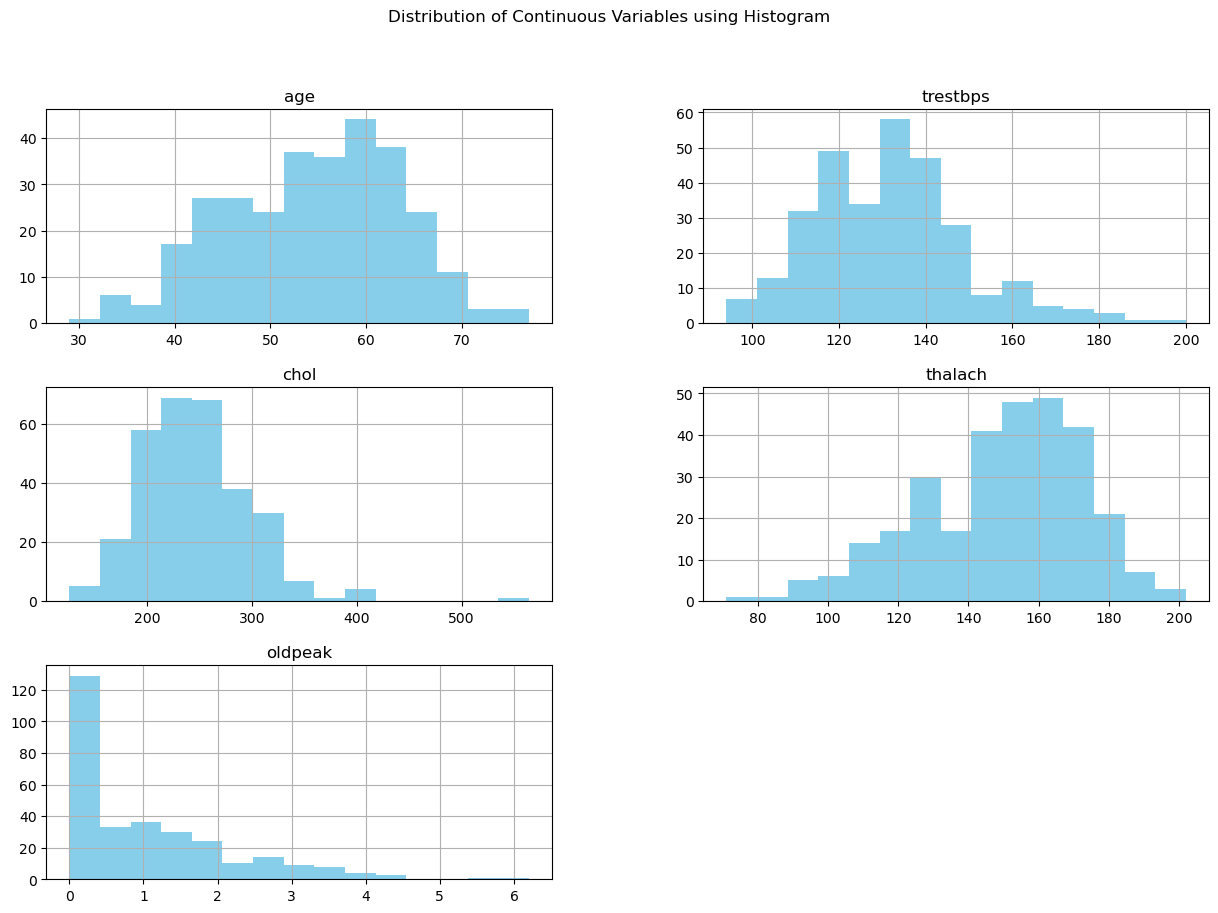

In [31]:
cont_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[cont_vars].hist(bins=15, figsize=(15,10), color='skyblue')
plt.suptitle("Distribution of Continuous Variables using Histogram")
plt.show()

## Modeling

Data Preprocessing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Scale continuous features

In [35]:
scaler = StandardScaler()
df[cont_vars] = scaler.fit_transform(df[cont_vars])

Split data

In [36]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

i) Random Forest Classifier

In [39]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.8360655737704918
Confusion Matrix:
 [[25  7]
 [ 3 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



ii) Logistic Regression

In [41]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression:
Accuracy: 0.7868852459016393
Confusion Matrix:
 [[22 10]
 [ 3 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.72      0.90      0.80        29

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



iii) Support Vector Machine (SVM)

In [48]:
svm = SVC(kernel = 'linear', random_state=42) #kernel options: linear, rbf, poly, ...
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

SVM:
Accuracy: 0.7540983606557377
Confusion Matrix:
 [[22 10]
 [ 5 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.71      0.83      0.76        29

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



iv) KNN

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
print("KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

KNN:
Accuracy: 0.7377049180327869
Confusion Matrix:
 [[21 11]
 [ 5 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.66      0.72        32
           1       0.69      0.83      0.75        29

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



Based on the comparison, the Random Forest Classifier emerged as the best-performing model, achieving the highest accuracy (83.6%) and balanced performance across precision, recall, and F1-scores. Logistic Regression also performed reasonably well, especially with high recall for heart disease cases, which may be useful in situations prioritizing identification of at-risk individuals. However, for an optimal balance of all evaluation metrics, the Random Forest Classifier is recommended for this project.